## K-Means Clustering

### Assignment 1 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

### Assignment 2 (2 scores):
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of different sizes among clusters to the performance of K-means.

### Assignment 3 (2 scores):

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where 

$$
    \Sigma_1 = 
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$ 

and

$$
\Sigma_2 = 
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans  
import cv2
from sklearn.mixture import GaussianMixture
from collections import Counter
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

In [35]:
class KMeans_ ():
    def __init__ (self, n_clusters=3, max_iter=100, tol=1e-4, random_state=0):
        ''''''
        self.n_clusters = n_clusters
        self.max_iter_ = max_iter
        self.tol = tol                      # Sai số cho phép để dừng
        self.random_state = random_state
        self.cluster_centers_ = None
        self.inertia_ = None                # Tổng sai số
        self.labels_ = None                 # Nhãn
        self.n_iter_ = 0                    # Số vòng lặp thực tế
        
    def fit (self, X: np.ndarray) -> np.ndarray:
        ''''''
        np.random.seed (self.random_state)
        random_idx = np.random.permutation (X.shape [0]) [:self.n_clusters]
        self.cluster_centers_ = X[random_idx]
        
        for i in range (self.max_iter_):
            distances = self._compute_distances_ (X)
            # E-step
            labels = np.argmin (distances, axis=1)
            
            # Update centroids
            new_centroids = []
            for j in range (self.n_clusters):
                cluster_points = X[labels == j]
                # Tính trung bình tất cả các điểm thuộc về điểm đó
                if (len (cluster_points) > 0):
                    centroid = cluster_points.mean (axis=0)
                else:
                    centroid = self.cluster_centers_[j]
                
                new_centroids.append (centroid)
                
            new_centroids = np.array (new_centroids)
            shift = np.sum ((new_centroids - self.cluster_centers_) ** 2)
            if shift <= self.tol:
                break
            self.cluster_centers_ = new_centroids
            self.n_iter_ += 1
            
        self.labels_ = labels
        self.inertia_ = np.sum ((X - self.cluster_centers_[labels]) ** 2)
        
    def predict (self, X: np.ndarray):
        distances = self._compute_distances_ (X)
        return np.argmin (distances, axis=1)
    
    def _compute_distances_ (self, X: np.ndarray) -> np.ndarray:
        return np.linalg.norm (X[:, np.newaxis] - self.cluster_centers_, axis=2)

## Gaussian Mixture Model

### Assignment 1 (2 scores):
- Use Numpy only to implement the Gaussian Mixture Model.
- Train Gaussian Mixture Model with EM method.

In [36]:
class GMM:
    def __init__(self, n_components=3, max_iter=100, tol=1e-4, random_state=None):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        
        self.means_ = None
        self.covariances_ = None
        self.weights_ = None
        self.resp_ = None
        self.log_likelihood_ = []

    def _initialize_parameters(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        random_idx = np.random.choice(n_samples, self.n_components, replace=False)
        self.means_ = X[random_idx]

        self.covariances_ = np.array([np.eye(n_features) for _ in range(self.n_components)])

        self.weights_ = np.ones(self.n_components) / self.n_components

    def _gaussian_pdf(self, X, mean, cov):
        n_features = X.shape[1]
        diff = X - mean
        try:
            cov_inv = np.linalg.inv(cov)
            sign, logdet = np.linalg.slogdet(cov)
            if sign != 1:
                # Ma trận covariance không dương xác định, thêm epsilon
                cov += 1e-6 * np.eye(n_features)
                cov_inv = np.linalg.inv(cov)
                sign, logdet = np.linalg.slogdet(cov)
    
        except np.linalg.LinAlgError:
            # Ma trận không khả nghịch, thêm epsilon
            cov += 1e-6 * np.eye(n_features)
            cov_inv = np.linalg.inv(cov)
            sign, logdet = np.linalg.slogdet(cov)

        exponent = np.einsum('ij,jk,ik->i', diff, cov_inv, diff)
        norm_const = -0.5 * (n_features * np.log(2 * np.pi) + logdet)
        return np.exp(norm_const - 0.5 * exponent)

    def fit(self, X):
        n_samples, n_features = X.shape
        self._initialize_parameters(X)

        for iteration in range(self.max_iter):
            # E-step: Tính responsibilities
            resp = np.zeros((n_samples, self.n_components))
            for k in range(self.n_components):
                resp[:, k] = self.weights_[k] * self._gaussian_pdf(X, self.means_[k], self.covariances_[k])

            resp_sum = resp.sum(axis=1)[:, np.newaxis]
            # Tránh chia cho 0
            resp_sum[resp_sum == 0] = 1e-10
            resp /= resp_sum

            # M-step: cập nhật parameters
            Nk = resp.sum(axis=0)  # tổng responsibilities từng cụm

            self.means_ = (resp.T @ X) / Nk[:, np.newaxis]

            for k in range(self.n_components):
                diff = X - self.means_[k]
                weighted_cov = (resp[:, k][:, np.newaxis] * diff).T @ diff
                self.covariances_[k] = weighted_cov / Nk[k]
                # Thêm epsilon vào đường chéo để tránh ma trận suy biến
                self.covariances_[k] += 1e-6 * np.eye(n_features)

            self.weights_ = Nk / n_samples

            # Tính log-likelihood
            log_likelihood = np.sum(np.log(resp_sum))
            self.log_likelihood_.append(log_likelihood)

            # Kiểm tra hội tụ
            if iteration > 0 and abs(self.log_likelihood_[-1] - self.log_likelihood_[-2]) < self.tol:
                break

        self.resp_ = resp
        self.labels_ = resp.argmax(axis=1)

    def predict_proba(self, X):
        n_samples = X.shape[0]
        probs = np.zeros((n_samples, self.n_components))
        for k in range(self.n_components):
            probs[:, k] = self.weights_[k] * self._gaussian_pdf(X, self.means_[k], self.covariances_[k])
        sum_probs = probs.sum(axis=1)[:, np.newaxis]
        sum_probs[sum_probs == 0] = 1e-10
        probs /= sum_probs
        return probs

    def predict(self, X):
        probs = self.predict_proba(X)
        return probs.argmax(axis=1)

### Assignment 2 (2 scores):

Use the Gaussian Mixture Model to filter out background of a given image.

In [37]:
def FilterOutBack_FrontGround (img_rgb, pixels):
    # --- GMM ---
    '''CLASS GMM TỰ VIẾT BẰNG NUMPY'''
    gmm = GMM(n_components=2, random_state=0)
    gmm.fit(pixels)
    gmm_labels = gmm.predict(pixels)
    gmm_counts = Counter(gmm_labels)
    gmm_fg_label = min(gmm_counts, key=gmm_counts.get)
    gmm_mask = (gmm_labels == gmm_fg_label).astype(np.uint8).reshape(img.shape[:2])
    gmm_bg_mask = 1 - gmm_mask

    gmm_foreground = img_rgb.copy()
    gmm_foreground[gmm_mask == 0] = [0, 0, 0]

    gmm_background = img_rgb.copy()
    gmm_background[gmm_bg_mask == 0] = [0, 0, 0]

    # --- GaussianMixture ---
    ''' CLASS GAUSSIANMIXTRURE TỪ SKLEARN'''
    gmm_sklearn = GaussianMixture (n_components=2, random_state=0)
    gmm_sklearn.fit(pixels)
    gmm_sklearn_labels = gmm_sklearn.predict(pixels)
    gmm_sklearn_counts = Counter(gmm_sklearn_labels)
    gmm_sklearn_fg_label = min(gmm_sklearn_counts, key=gmm_sklearn_counts.get)
    gmm_sklearn_mask = (gmm_sklearn_labels == gmm_sklearn_fg_label).astype(np.uint8).reshape(img.shape[:2])
    gmm_sklearn_bg_mask = 1 - gmm_sklearn_mask

    gmm_sklearn_foreground = img_rgb.copy()
    gmm_sklearn_foreground[gmm_sklearn_mask == 0] = [0, 0, 0]

    gmm_sklearn_background = img_rgb.copy()
    gmm_sklearn_background[gmm_sklearn_bg_mask == 0] = [0, 0, 0]

    # --- KMeans ---
    '''CLASS KMEANS TỰ VIẾT BẰNG NUMPY'''
    kmeans = KMeans_(n_clusters=2, random_state=0)
    kmeans.fit (pixels)
    kmeans_labels = kmeans.predict(pixels)
    kmeans_counts = Counter(kmeans_labels)
    kmeans_fg_label = min(kmeans_counts, key=kmeans_counts.get)
    kmeans_mask = (kmeans_labels == kmeans_fg_label).astype(np.uint8).reshape(img.shape[:2])
    kmeans_bg_mask = 1 - kmeans_mask

    kmeans_foreground = img_rgb.copy()
    kmeans_foreground[kmeans_mask == 0] = [0, 0, 0]

    kmeans_background = img_rgb.copy()
    kmeans_background[kmeans_bg_mask == 0] = [0, 0, 0]

    # --- KMeans ---
    '''CLASS KMEANS TỪ SKLEARN'''
    Kmeans_sklearn = KMeans(n_clusters=2, random_state=0)
    Kmeans_sklearn_labels = Kmeans_sklearn.fit_predict(pixels)
    Kmeans_sklearn_counts = Counter(Kmeans_sklearn_labels)
    Kmeans_sklearn_fg_label = min(Kmeans_sklearn_counts, key=Kmeans_sklearn_counts.get)
    Kmeans_sklearn_mask = (Kmeans_sklearn_labels == Kmeans_sklearn_fg_label).astype(np.uint8).reshape(img.shape[:2])
    Kmeans_sklearn_bg_mask = 1 - Kmeans_sklearn_mask

    Kmeans_sklearn_foreground = img_rgb.copy()
    Kmeans_sklearn_foreground[Kmeans_sklearn_mask == 0] = [0, 0, 0]

    Kmeans_sklearn_background = img_rgb.copy()
    Kmeans_sklearn_background[Kmeans_sklearn_bg_mask == 0] = [0, 0, 0]

    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.figure(figsize=(20,8))
    plt.subplot(1,8,1)
    plt.imshow(gmm_foreground)
    plt.title('GMM (Numpy) \n Foreground')
    plt.axis('off')

    plt.subplot(1,8,2)
    plt.imshow(gmm_background)
    plt.title('GMM (Numpy) \n Background')
    plt.axis('off')

    plt.subplot(1,8,3)
    plt.imshow(gmm_sklearn_foreground)
    plt.title('GaussianMixture (sklearn) \n Foreground')
    plt.axis('off')

    plt.subplot(1,8,4)
    plt.imshow(gmm_sklearn_background)
    plt.title('GaussianMixture (sklearn) \n Background')
    plt.axis('off')

    plt.subplot(1,8,5)
    plt.imshow(kmeans_foreground)
    plt.title('KMeans (Numpy) \n Foreground')
    plt.axis('off')

    plt.subplot(1,8,6)
    plt.imshow(kmeans_background)
    plt.title('KMeans (Numpy) \n Background')
    plt.axis('off')

    plt.subplot(1,8,7)
    plt.imshow(Kmeans_sklearn_foreground)
    plt.title('KMeans (sklearn) \n Foreground')
    plt.axis('off')

    plt.subplot(1,8,8)
    plt.imshow(Kmeans_sklearn_background)
    plt.title('KMeans (sklearn) \n Background')
    plt.axis('off')

    plt.tight_layout ()
    plt.show()


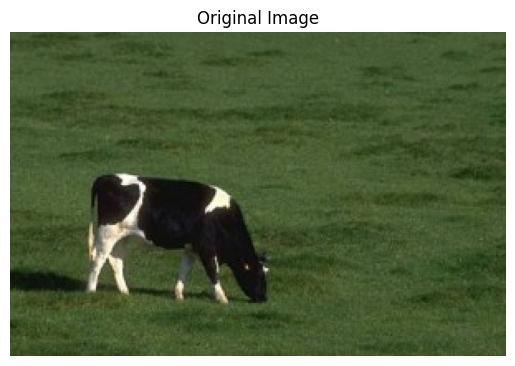

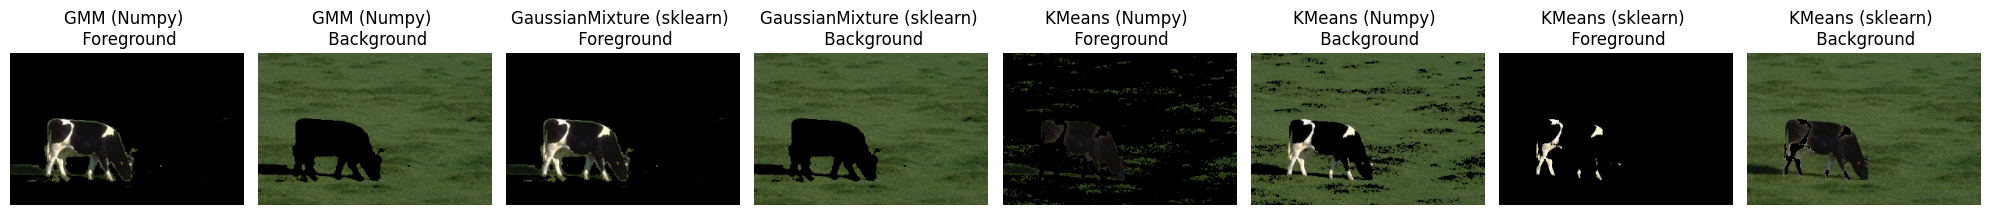

In [38]:
img = cv2.imread('cow.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB
pixels = img_rgb.reshape(-1, 3)

FilterOutBack_FrontGround (img_rgb, pixels)

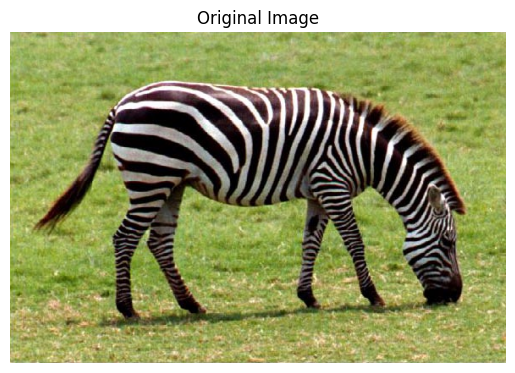

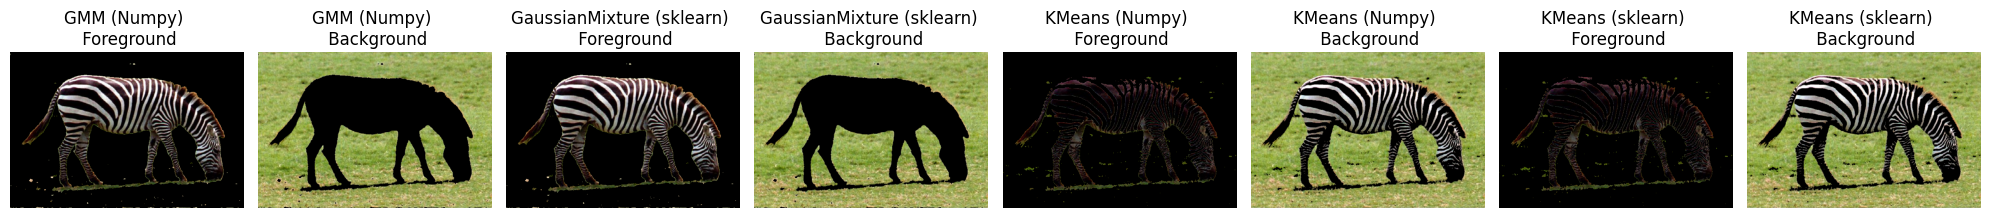

In [33]:
img = cv2.imread('zebra.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB
pixels = img_rgb.reshape(-1, 3)

FilterOutBack_FrontGround (img_rgb, pixels)